<a href="https://colab.research.google.com/github/vvrgit/ML-Models-and-Applications/blob/main/SimpleLinearRegression_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/SalesData.csv')
data.head()

,Advertisement,Sales
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [18]:
y = data['Sales'].values
X = data['Advertisement'].values

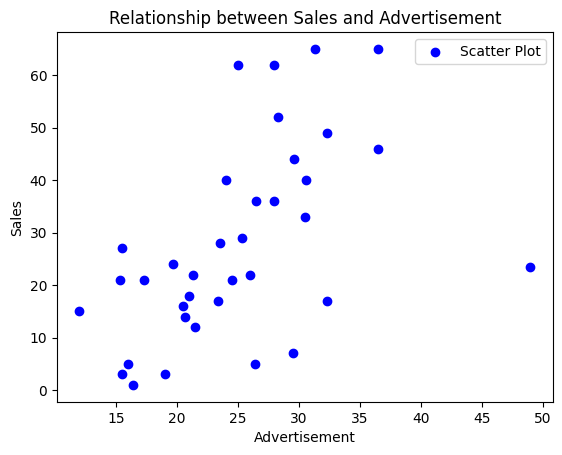

In [20]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertisement')
plt.ylabel('Sales')
plt.xlabel('Advertisement')
plt.legend(loc=1)
plt.show()

In [21]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Data Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
m = lm.coef_
c = lm.intercept_
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[0.93570897]]
Estimated model intercept, c: [2.5584345]


# Model Prediction with training and testing data

In [26]:
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)

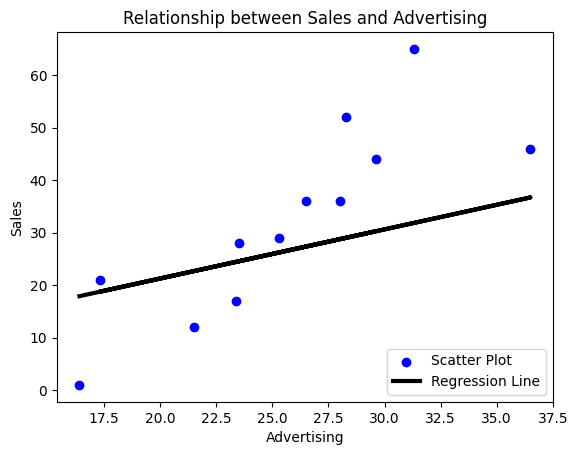

In [28]:
plt.scatter(X_test, y_test, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred_test, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.legend(loc=4)
plt.show()

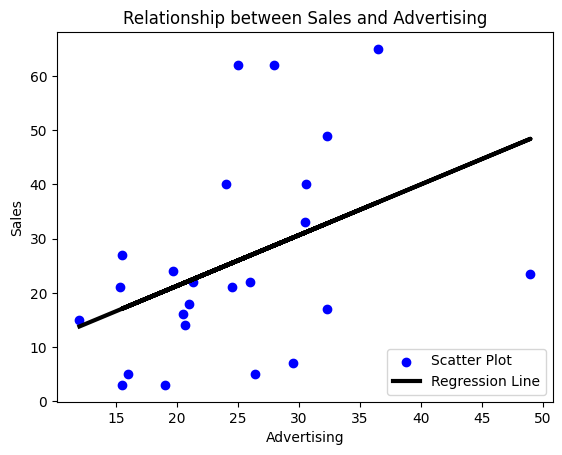

In [29]:
plt.scatter(X_train, y_train, color = 'blue', label='Scatter Plot')
plt.plot(X_train, y_pred_train, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.legend(loc=4)
plt.show()

# Error Metrics

In [30]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train))
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 16.6011817626655
Mean square error 275.5992359170577
Mean absolute error 13.148102004856861


In [31]:
#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_test, y_pred_test))
print('Mean square error', mse)
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 14.458866862368287
Mean square error 209.05883094369176
Mean absolute error 11.545269466508103


#Save Model for Deploymnet

In [32]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lm, open(filename, 'wb'))

#Deployment

In [33]:
user_ip=input('enter advertising cost')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
sales=lm.predict(adv)
print('Advertising cost of the month',float(user_ip))
print('Sales cost of the month',sales)

enter advertising cost25
Advertising cost of the month 25.0
Sales cost of the month [[25.95115874]]


In [34]:
model = pickle.load(open('model.pkl', 'rb'))
user_ip=input('enter advertising cost')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
prediction = model.predict(adv)
result = prediction[0]
print('Advertising cost of the month',float(user_ip))
print('Sales cost of the month',result)

enter advertising cost25
Advertising cost of the month 25.0
Sales cost of the month [25.95115874]
